# Datos del Estudiante.

1. Nombre: Luis Felipe Narváez Gómez 
2. Código: 2312660
3. Universidad Santo Tomas seccional Tunja
4. Facultad: Ingeniería de Sistemas
5. Asignatura: Electiva I - Deep Learning
6. Periodo: 2021-2

# NAIVE BAYES o REDES BAYESIANAS


## ¿Que es una red Bayesiana?

Una red Bayesiana es un modelo probabilistico que relaciona un conjunto de variables aleatorias mediante un grafo dirigido. Son redes graficas sin ciclos en el que se representan variables aleatorias y las relaciones de probabilidad que existan entre ellas que permiten conseguir soluciones a problemas de decision en casos de insertidumbre.


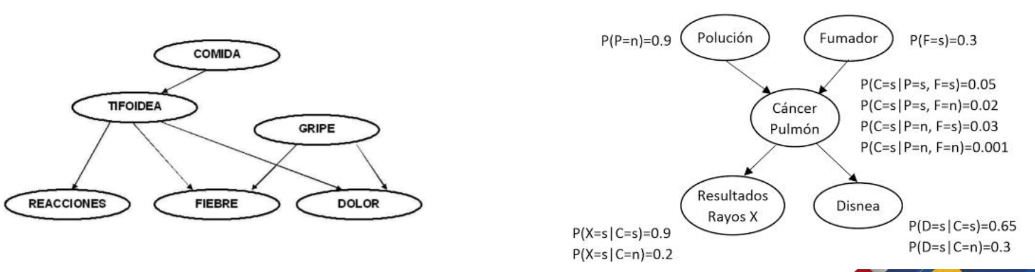

Este algoritmo esta basado en el Teorema de Bayes:

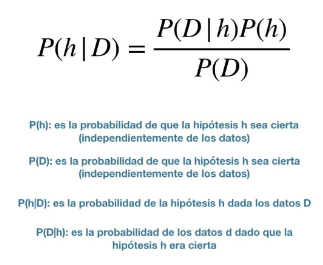

Con una suposicion de independencia entre los predictores, supremamente util para trabajar datos muy grandes.
El algoritmo asume que el efecto de una caracteristica particular en una clase es independiente de otras caracteristicas.

***VENTAJAS***

1. Se le considera un algoritmo facil y rapido de usar
2. Funciona muy bien en predicciones multiclase.
3. Es mejor frente a las regresiones logisticas.
4. Funciona bien en variables de entradas categorias, frente a variables numericas.

***PRECAUSIONES***

1. Si se manejan variables categorias se deben garantizar que todas las categorias esten presentes tanto en el TRAIN como en el TEST, de lo contrario generar probabilidad 0.
2. El algoritmo considera todas  las variables como independientes, pero en la vida real no siempre es cierto ejemplo:
  1. sexo e ingresos
  2. estrato_social y ubicacion_geografica

***USOS***

Este tipo de algoritmo es considerado como un algoritmo ingenuo, el cual puede ser usado en:

1. Procesamiento de lenguaje natural (PLN) como analisis de textos.
2. Analisis de SPAM en correos electronicos.
3. Motores de recomendaciones en paginas de Compras Online.
4. Diagnostico de la Enfermedad, modelamiento de posibes sintomas y prediccion de si una persona esta enferma o no.
5. Industria Farmaceutica, modelamiento del comportamiento celular  con el fin de formar predicciones, tambien para el seguimiento de la cantidad de quimicos utilizados en los farmacos

# DataFrame ¿Comprar o Arrendar una Casa?

 Contexto:

 ¿Que sera mejor?¿Comprar o arrendar una casa?

 Algunos supuestos con los que podemos trabajar son:

 1. La  data esta creada en clase y esta pensado en Dolares, aunque se podria traspolar esto ultimo a otra moneda.
 2. No tienen una ubicacion geografica, cuando sabemos que dependera mucho los precios de los inmuebles de distintas zonas.
 3. Se supone una hipoteca fija a 30 años con interes de mercado "bajo".

## Importar Librerias

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

## Importar dataset desde Github

Origen de la base de datos:

https://github.com/OnRuiso/Deep-Learning-/blob/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T10/Naibe_bayes_comprar_alquilar_casa.csv

Raw:

https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T10/Naibe_bayes_comprar_alquilar_casa.csv

In [2]:
df_home = pd.read_csv("https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T10/Naibe_bayes_comprar_alquilar_casa.csv")
df_home.head(3)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1


## Descripcion de los datos

1. ingresos: los ingresos de la familia mensual (DOLARES)
2. gastos comunes: pagos de luz, agua, gas, etc mensual
3. pago coche: si se está pagando cuota por uno o más coches, y los gastos en combustible, etc al mes.
4. gastos_otros: compra en supermercado y lo necesario para vivir al mes
5. ahorros: suma de ahorros dispuestos a usar para la compra de la casa.
6. vivienda: precio de la vivienda que quiere comprar esa familia
7. estado civil:
  1. 0-soltero
  2. 1-casados
  3. 2-divorciados
8. hijos: cantidad de hijos menores y que no trabajan.
9. trabajo:
  1. 0-sin empleo
  2. 1-autónomo (freelance)
  3. 2-empleado
  4. 3-empresario
  5. 4-pareja: autónomos
  6. 5-pareja: empleados
  7. 6-pareja: autónomo y asalariado
  8. 7-pareja:empresario y autónomo
  9. 8-pareja: empresarios los dos o empresario y empleado
10. comprar:
  1. 0-No comprar
  2. 1-Comprar (esta será nuestra columna de salida, para aprender)

## Informacion DataFrame

In [3]:
df_home.describe()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


In [4]:
df_home.isnull().sum()

ingresos          0
gastos_comunes    0
pago_coche        0
gastos_otros      0
ahorros           0
vivienda          0
estado_civil      0
hijos             0
trabajo           0
comprar           0
dtype: int64

In [5]:
df_home.dtypes

ingresos          int64
gastos_comunes    int64
pago_coche        int64
gastos_otros      int64
ahorros           int64
vivienda          int64
estado_civil      int64
hijos             int64
trabajo           int64
comprar           int64
dtype: object

In [6]:
df_home.shape

(202, 10)

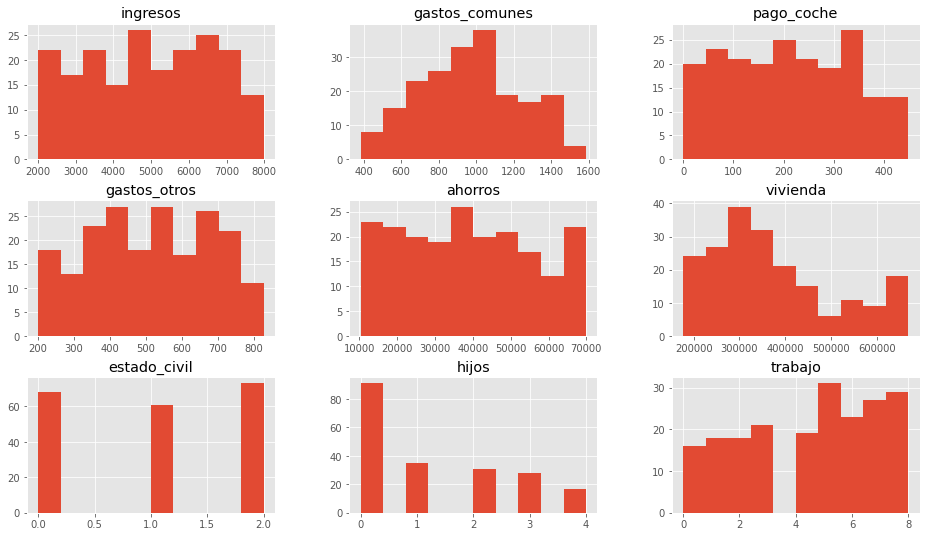

In [10]:
df_home.drop(['comprar'], axis=1).hist()
plt.show()

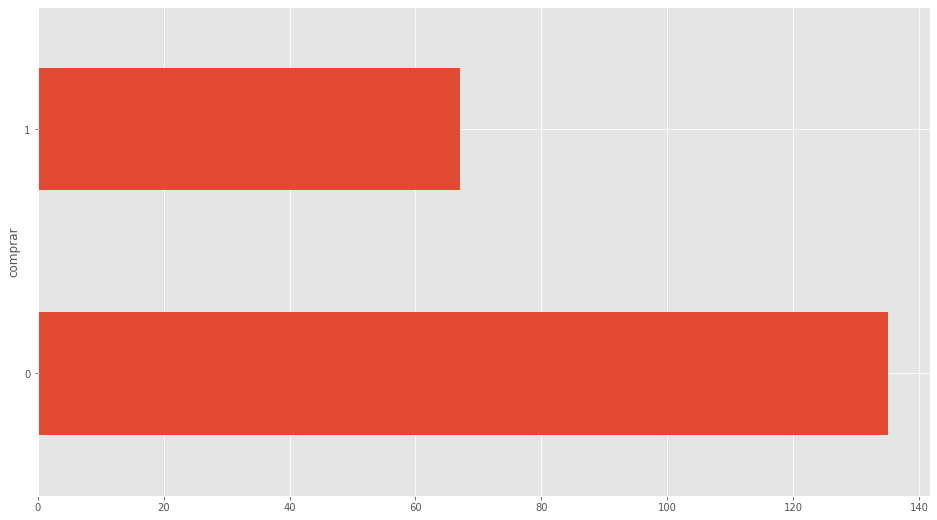

In [11]:
df_home.groupby('comprar').size().plot.barh()

In [12]:
print(df_home.groupby('comprar').size())

comprar
0    135
1     67
dtype: int64


In [13]:
df_home.keys()

Index(['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros', 'ahorros',
       'vivienda', 'estado_civil', 'hijos', 'trabajo', 'comprar'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


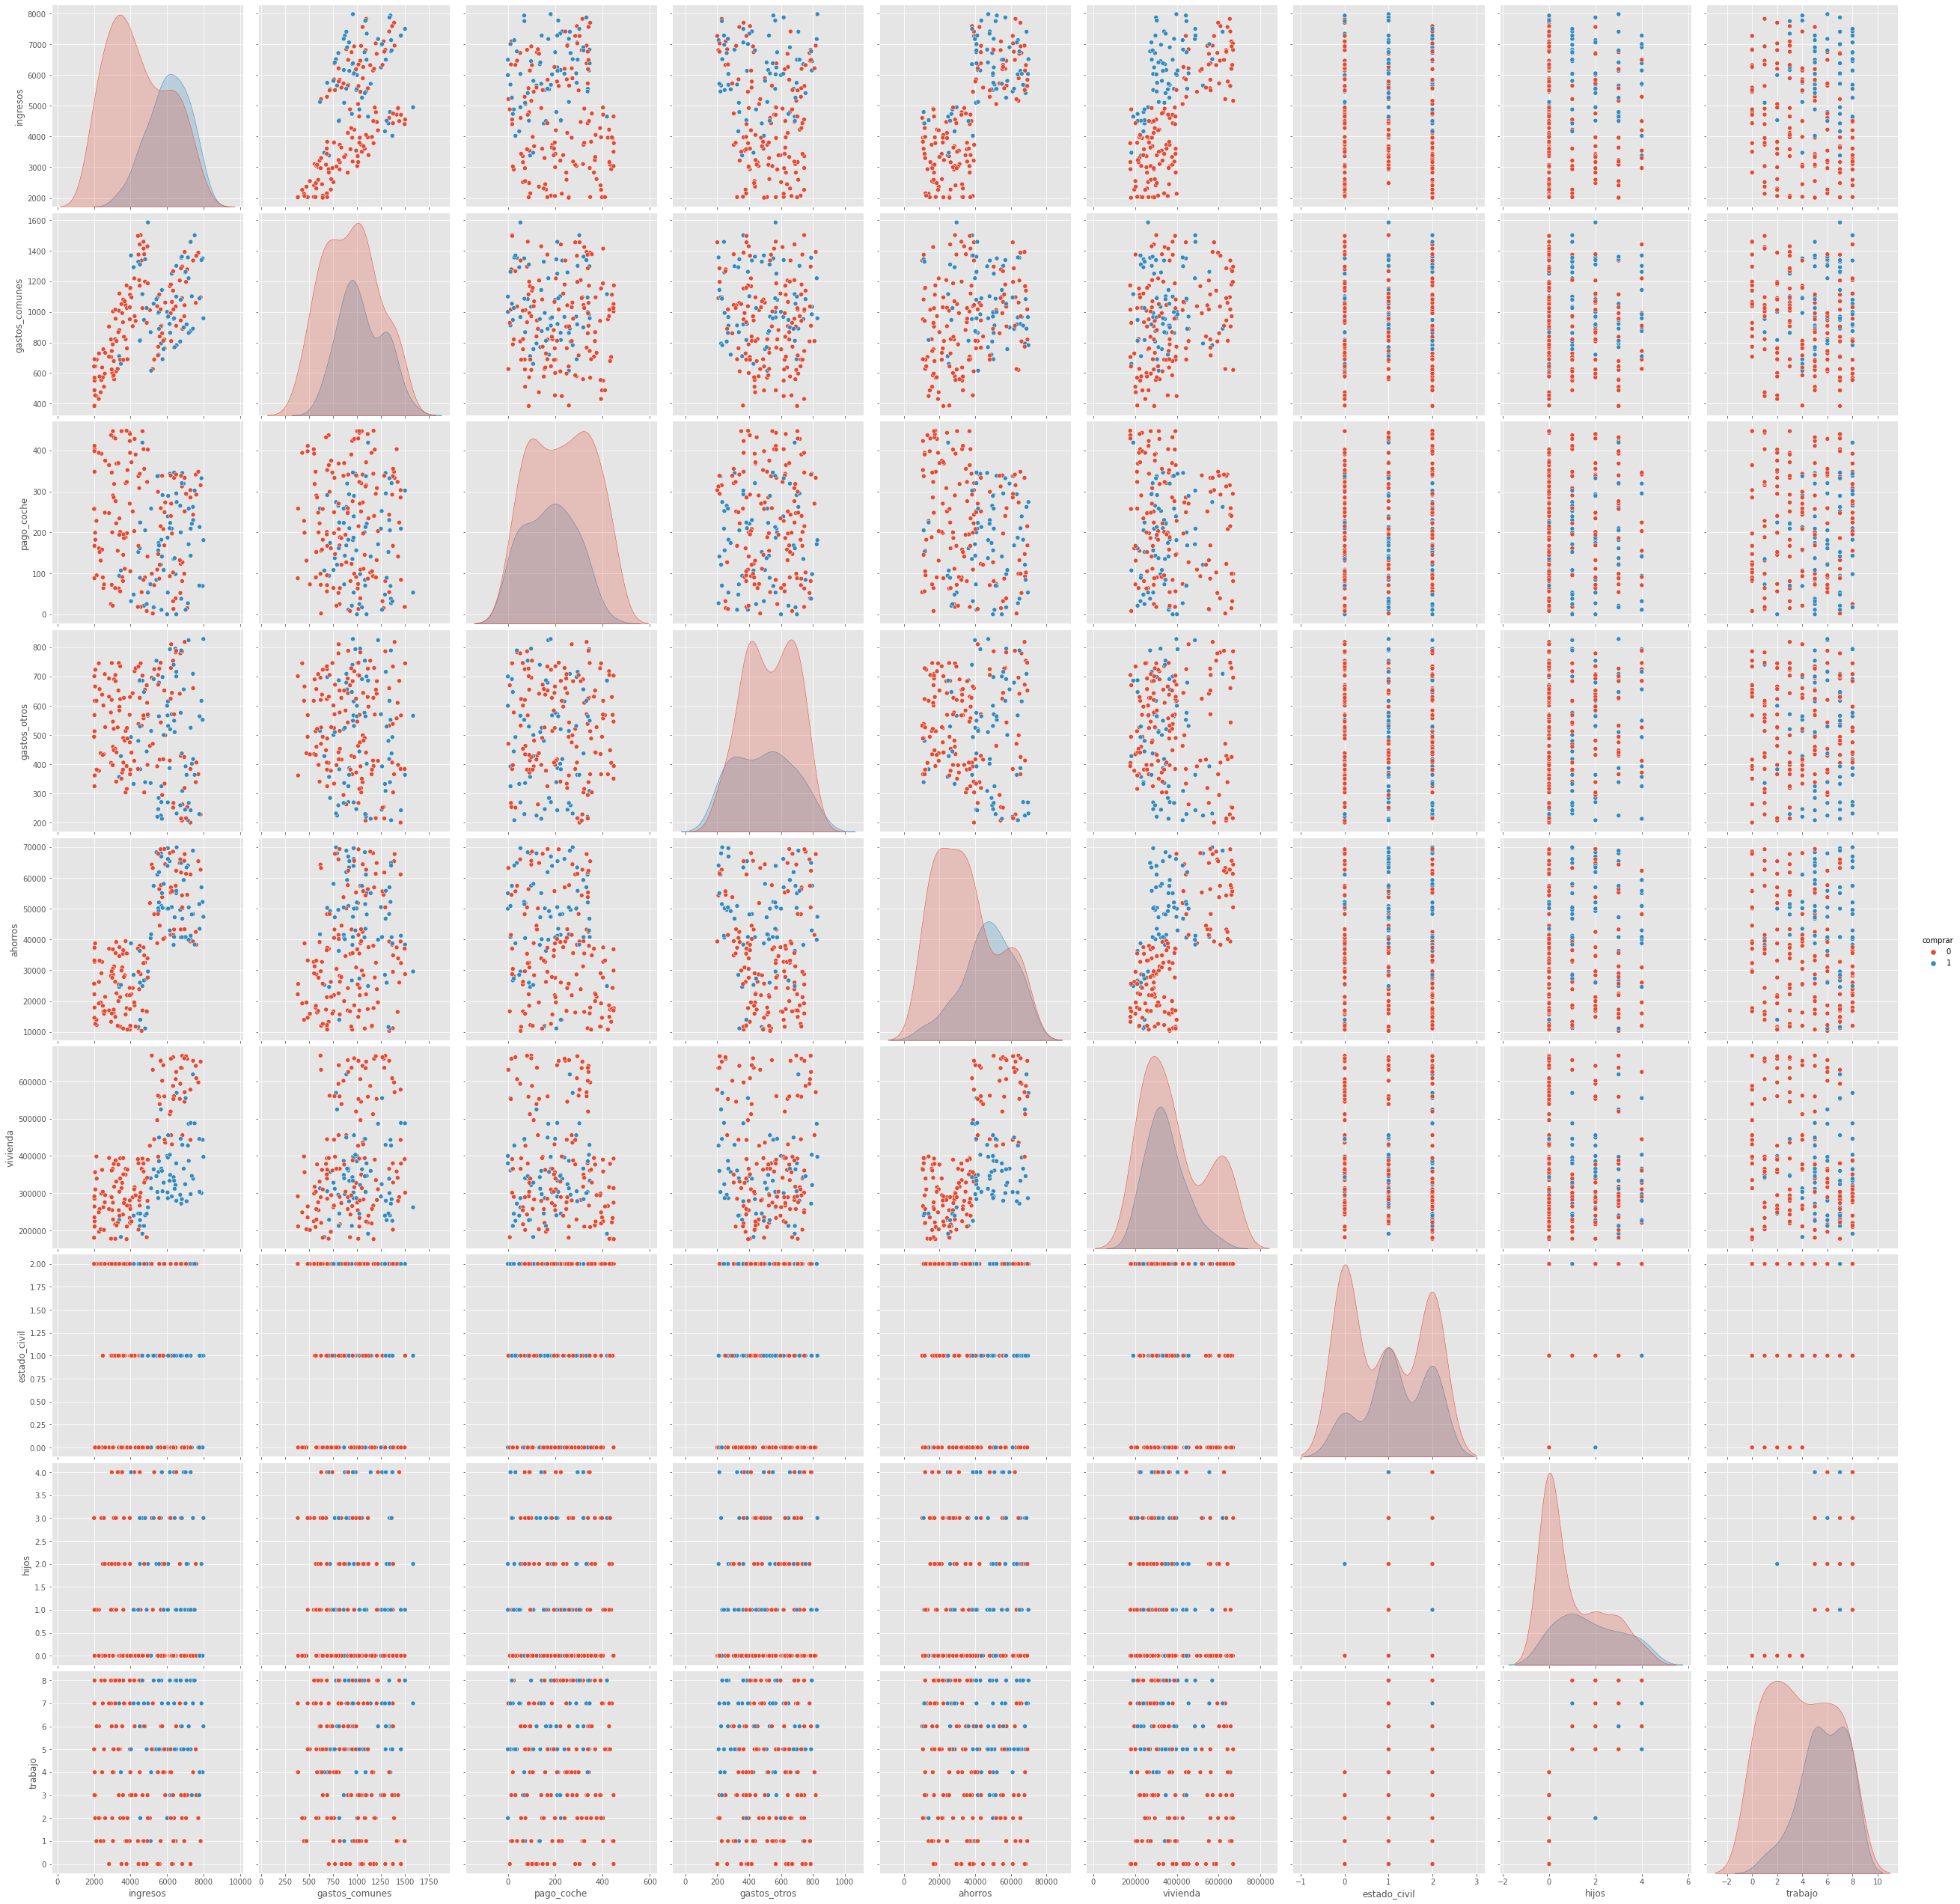

In [14]:
"""
graficos de relaciones en pares en el dataset.

hue (como parametro)= variación de colores dependiendo del valor de la variable
Hara un grafico de correlaciones
"""
sb.pairplot(df_home, hue='comprar',size=4,vars=['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros', 'ahorros',
       'vivienda', 'estado_civil', 'hijos', 'trabajo'],kind='scatter')

## Simplificando Datos

In [15]:
# Los datos que tenemos hasta el momento son:
df_home.head(1)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1


In [16]:
# podemos resumir o simplificar los datos de gatos en una sola columna llamada gastos
df_home['gastos']=(df_home['gastos_comunes']+df_home['gastos_otros']+df_home['pago_coche'])

In [17]:
# Ahora tendriamos lo siguiente
df_home.head(1)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos
0,6000,1000,0,600,50000,400000,0,2,2,1,1600


In [18]:
# ahora bien podemos ver que es lo que vamos a financiar concretamente, juntando las columnas de vivienda y ahorros
df_home['financiar']=df_home['vivienda']-df_home['ahorros']

In [19]:
# Ahora tendriamos lo siguiente
df_home.head(1)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
0,6000,1000,0,600,50000,400000,0,2,2,1,1600,350000


In [20]:
"""
Para una mejor discriminacion de los datos, podemos quitar las columnas que fueron 
resumidas, como la de los datos. Las de financiazion las dejamos para tener una 
mejor discriminacion al momento de analizar los datos. Para tener un Data Frame 
sin estas columnas, o bien no las tomamos en cuenta por codigo en las futuras 
operaciones o creamos un nuevo DatFrame sin las mismas, esto, o sobreescribir el que ya se tiene.
"""
dfHOME = df_home.drop(['gastos_comunes','gastos_otros','pago_coche'], axis=1)

In [21]:
df_home.head(3)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
0,6000,1000,0,600,50000,400000,0,2,2,1,1600,350000
1,6745,944,123,429,43240,636897,1,3,6,0,1496,593657
2,6455,1033,98,795,57463,321779,2,1,8,1,1926,264316


In [22]:
dfHOME.head(3)

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
0,6000,50000,400000,0,2,2,1,1600,350000
1,6745,43240,636897,1,3,6,0,1496,593657
2,6455,57463,321779,2,1,8,1,1926,264316


## Separando Datos (X,Y)

In [23]:
X=dfHOME.drop(['comprar'], axis=1)
y=dfHOME['comprar']

## Seleccionar las mejores columnas

In [24]:
#Utilizar una Clase de SkLearn llamada SelectKBest con la que seleccionaremos las 5 mejores características
best=SelectKBest(k=5)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print('LAS MEJORES 5 CARACTERISTICAS / COLUMNAS, SON:', X.columns[selected])

LAS MEJORES 5 CARACTERISTICAS / COLUMNAS, SON: Index(['ingresos', 'ahorros', 'hijos', 'trabajo', 'financiar'], dtype='object')


## Correlacion mejores caracteristicas

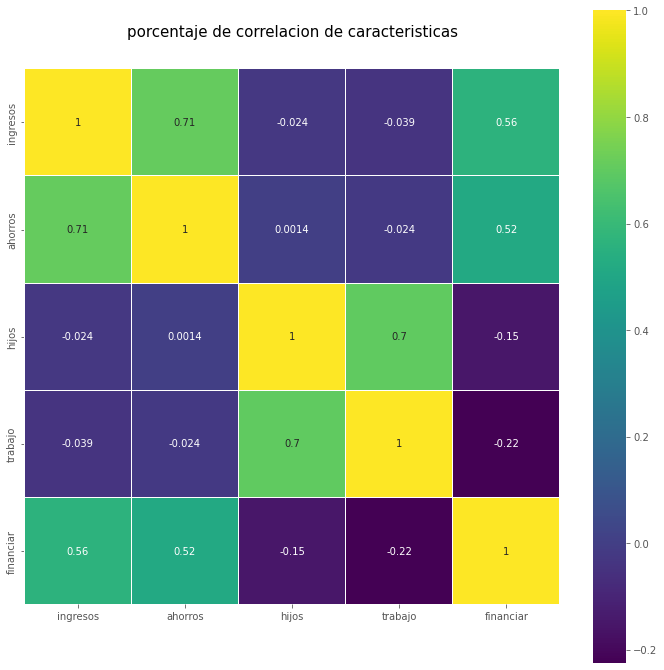

In [25]:
used_features =X.columns[selected]

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('porcentaje de correlacion de caracteristicas', y=1.05, size=15)
sb.heatmap(dfHOME[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Aunque existe una correlacion, esta no es muy alta y estas por analisis de la situacion, tampoco son muy confiables para definir si se quiere comprar o alquilar una casa, se podria hacer un nuevo estudio.

## Train and Test


In [26]:
# separamos la data de entrenamiento VS testeo
X_train, X_test = train_test_split(dfHOME, test_size=0.35, random_state=42) 
y_train =X_train["comprar"]
y_test = X_test["comprar"]

In [28]:
#Instanciar algoritmo y entrenar

# Instanciamos el clasificador
gnb = GaussianNB()
# entrenamos el clasificador
gnb.fit(    X_train[used_features].values,    y_train  ) 
y_pred = gnb.predict(X_test[used_features])

print('Precisión en el set de Entrenamiento: {:.2f}'.format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de Test: {:.2f}'.format(gnb.score(X_test[used_features], y_test)))

Precisión en el set de Entrenamiento: 0.87
Precisión en el set de Test: 0.85


In [29]:
#Prueba del modelo

#                 ['ingresos', 'ahorros', 'hijos', 'trabajo', 'financiar']
print(gnb.predict([[4000,        3800,     4,       5,         200000],
                   [6000,        34000,    2,       5,         320000] ]))
#Resultado esperado 0-Alquilar, 1-Comprar casa


[0 1]
